# Google Apps 商店的数据分析

## 简介

相信大家对移动应用商店都不陌生吧。Google Play Store（Google Play商店）是谷歌官方的软件应用商店，拥有上架软件数十万款，下载量更是突破了20亿次，为了手机用户提供了极为广泛的应用选择，很受大家的欢迎。



本数据集(googleplaystore.csv)包含了 Google Play 商店中 App 的数据。该数据是Kaggle中 [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) 的一部分，其中包含 Google Play 商店中 10k+ 应用软件的信息。

数据中的变量含义解释：
```
App: 应用的名称，字符变量。
Category: 应用所属的分类，字符变量。
Rating: 某应用的用户评分，数值变量。
Reviews: 某应用获得的用户评论数量，数值变量。
Size: 某应用的所占存储空间的大小，字符变量。
Installs: 用户安装和下载某应用的次数，字符变量。
Type: 付费或免费，分类变量。
Price: 价格，字符变量。
Content Rating: 应用商店针对内容给出的年龄评级组 - Children / Mature 21+ / Adult，分类变量。
Genres: 类型/流派，一个应用可以属于多个流派，比如音乐、游戏、家庭等，字符变量。
Last Updated: 应用最新更新的日期，字符变量。
Current Ver: 当前应用的版本，字符变量。
Android Ver: 安装该应用所需要的最低安卓版本，字符变量。

```

## 提出问题

**问题**：
>  1、那种类型的app更加受用户欢迎，评分更高？
>  
>  2、最受欢迎（下载量最高）的 Apps 有什么特征？

## 数据评估和清理

In [2]:
# 确保在可视化中可以显示中文
!rm -rf ~/.cache/matplotlib/fontList.json
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [3]:
# Load pacakges
import pandas as pd
import numpy as np

In [4]:
# Load the dataset
df = pd.read_csv('googleplaystore.csv')

In [5]:
# Check the dataset general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# Clean the data.
# I think columns:("Current Ver","Last Updated","Reviews") are unimportant, so I droped them.
df_clean = df.copy()
df_clean.drop(["Current Ver","Last Updated","Reviews","Installs","Size","Price","Genres","Android Ver"],inplace=True,axis=1)
df_clean.drop(df_clean.query('Rating < 4.0').index,inplace=True)
df_clean.dropna(how="any",inplace=True)
df_clean.drop_duplicates(inplace=True)
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6371 entries, 0 to 10840
Data columns (total 5 columns):
App               6371 non-null object
Category          6371 non-null object
Rating            6371 non-null float64
Type              6371 non-null object
Content Rating    6371 non-null object
dtypes: float64(1), object(4)
memory usage: 298.6+ KB


## 数据探索分析
#### 1、去除用户评分低于4.1的数据。
#### 2、基于此绘制饼图，分析各列（Category，Type，Content Rating）下，各项所占比例。

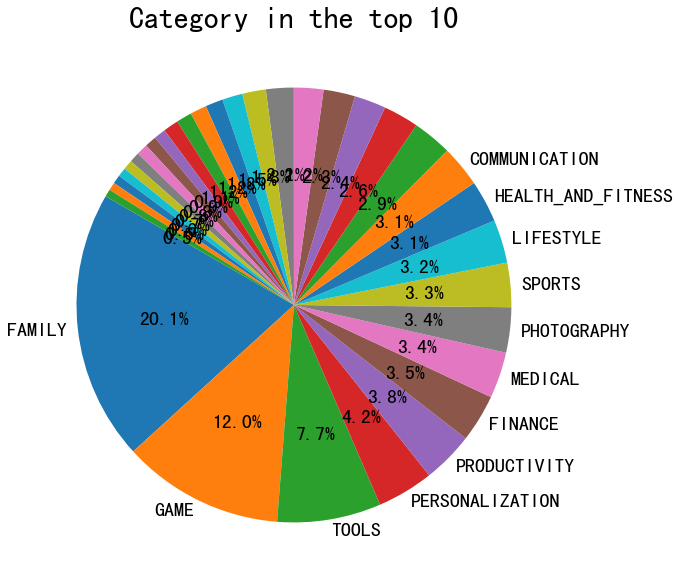

In [7]:
plt.figure(figsize=(20,10))
item = "Category"
serise = df_clean[item].value_counts()
x = serise.index.tolist()
y = serise.tolist()
for i,j in enumerate(y):
    if (j / 6372) < 0.03:
        x[i] = ""
plt.title(item + ' in the top 10',fontsize=30)    
plt.pie(y,labels=x,autopct='%1.1f%%',shadow=False,startangle=150,labeldistance=1.05,pctdistance=0.6,textprops={'fontsize':20})
plt.show()

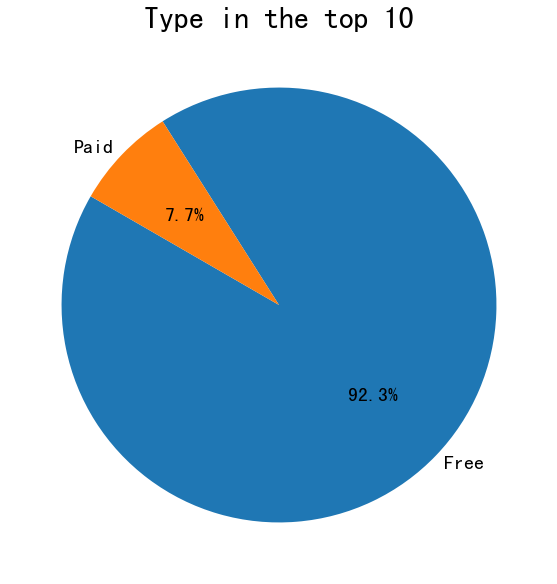

In [8]:
plt.figure(figsize=(20,10))
item = "Type"
serise = df_clean[item].value_counts()
x = serise.index
y = serise.tolist()
plt.title(item + ' in the top 10',fontsize=30)    
plt.pie(y,labels=x,autopct='%1.1f%%',shadow=False,startangle=150,labeldistance=1.05,pctdistance=0.6,textprops={'fontsize':20})
plt.show()

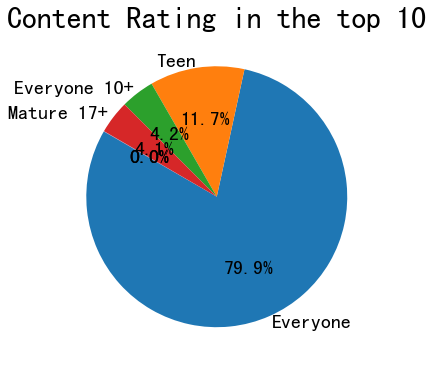

In [9]:
plt.figure(figsize=(20,6))
item = "Content Rating"
serise = df_clean[item].value_counts()
x = serise.index.tolist()
y = serise.tolist()
for i,j in enumerate(y):
    if (j / 6372) < 0.03:
        x[i] = ""
plt.title(item + ' in the top 10',fontsize=30)    
plt.pie(y,labels=x,autopct='%1.1f%%',shadow=False,startangle=150,labeldistance=1.05,pctdistance=0.6,textprops={'fontsize':20})
plt.show()

In [14]:
df_clean2 = df.copy()
df_clean2.dropna(how="any",inplace=True)
df_clean2.drop_duplicates(inplace=True)
df_clean2.drop_duplicates("Installs",inplace=True)
df_clean2.sort_values("Installs",inplace=True,ascending=False)

df_clean2.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
605,Cardi B Live Stream Video Chat - Prank,DATING,4.4,28,3.4M,500+,Free,0,Everyone,Dating,"July 16, 2018",2.5,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


## 得出结论

**问题一**：那种类型的app更加受用户欢迎，评分更高？

**答案**：
>  1、FAMILY,GAME,TOOLS这三个类别的app很受欢迎。
>  
>  2、免费的app很受欢迎。
>  
>  3、面向Teen和Everyone年龄段的app很受欢迎。

**问题二**：最受欢迎（下载量最高）的 Apps 有什么特征？

**答案**：
>  1、
>  
>  2、
>  
>  3、

## 反思

**问题**：在你的分析和总结过程中是否存在逻辑严谨。是否有改进的空间? 你可以从下面的一些角度进行思考：
1. 数据集是否完整，包含所有想要分析的数据？
2. 在对数据进行处理的时候，你的操作（例如删除/填充缺失值）是否可能影响结论？
3. 是否还有其他变量（本数据中没有）能够对你的分析有帮助？
4. 在得出结论时，你是否混淆了相关性和因果性？

**答案**：将此文本替换为你的回答！

恭喜你完成了此项目！这只是数据分析过程的一个样本：从生成问题、整理数据、探索数据到得出结论。在数据分析(进阶)纳米学位中，你将会学到更多高级的数据分析方法和技术，如果你感兴趣的话，我们鼓励你继续学习后续的课程，掌握更多的数据分析的高级技能！

> 若想与他人分享我们的分析结果，除了向他们提供 jupyter Notebook (.ipynb) 文件的副本外，我们还可以将 Notebook 输出导出为一种甚至那些未安装 Python 的人都能打开的形式。从左上方的“文件”菜单，前往“下载为”子菜单。然后你可以选择一个可以更普遍查看的格式，例如 HTML (.html) 。你可能需要额外软件包或软件来执行这些导出。